# Modele analizy danych

Tomasz Rodak

---

## Regresja metodą $k$-najbliższych sąsiadów

Celem tego arkusza jest eksperymentalne sprawdzenie wzoru wyrażającego kompromis pomiędzy błędem obciążenia a błędem wariancji w regresji metodą $k$-najbliższych sąsiadów.

Ustalmy $k \in \mathbb{N}$. Niech $\mathcal{T}= \{ (x_1, y_1), \ldots, (x_n, y_n) \}$ będzie zbiorem treningowym, gdzie $x_i \in \mathbb{R}^p$ jest wektorem cech, a $y_i \in \mathbb{R}$ jest wartością zmiennej objaśnianej. Niech $x$ będzie (nowym) punktem.
Wówczas przewidywana wartość $y$ dla punktu $x$ w regresji metodą $k$-najbliższych sąsiadów zadana jest wzorem:

\begin{equation*}
\hat{f}(x) = \frac{1}{k} \sum_{i \in N_k(x)} y_i,
\end{equation*}

gdzie $N_k(x)$ jest zbiorem $k$ najbliższych sąsiadów punktu $x$ ze zbioru treningowego $\mathcal{T}$. Zatem $\hat{f}(x)$ jest średnią z tych $k$ wartości $y_i$, które odpowiadają $k$ najbliższym sąsiadom $x_i$ punktu $x$.

## Zadanie 3.1

Napisz funkcję `generate_data(f, *, a, b, n, sigma)`. Funkcja ta ma generować dane zgodnie z modelem

\begin{equation*}
Y = f(X) + \varepsilon,
\end{equation*}

gdzie $\varepsilon \sim N(0, \sigma^2)$, $X \sim U(a, b)$, a $f$ jest funkcją przekazaną jako argument.

Opis parametrów:
- `f` – obiekt wywoływalny, reprezentujący funkcję $f$,
- `a`, `b` – liczby rzeczywiste, początek i koniec przedziału, z którego losowane są wartości $x$,
- `n` – liczba całkowita, liczba punktów do wygenerowania,
- `sigma` – liczba rzeczywista, odchylenie standardowe błędu.

Funkcja powinna zwracać krotkę $(X, Y)$, gdzie $X$ i $Y$ to tablice jednowymiarowe zawierające odpowiednio wartości $x$ i $y$.

Zastosuj funkcję `generate_data()` do wygenerowania 200 punktów zgodnie z modelem

\begin{equation*}
Y = \sin X + \varepsilon,
\end{equation*}

gdzie $X \sim U(0, 10)$, a $\varepsilon \sim N(0, 0.3^2)$.

Narysuj wykres rozproszenia $Y$ od $X$ wraz z wykresem funkcji regresji $\eta(x)=\mathbb{E}(Y\mid X=x)$.

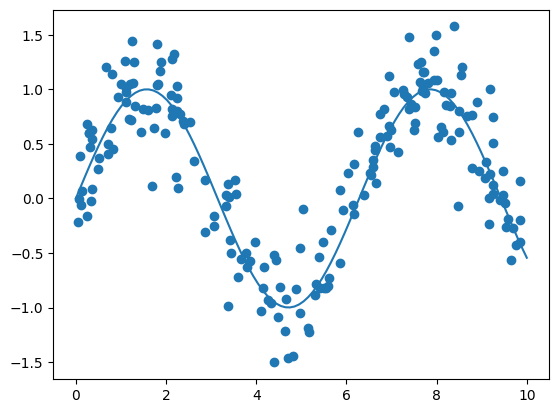

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(f, *, a, b, n, sigma):
  X = np.random.uniform(a, b, n)
  Y = f(X) + np.random.normal(0, sigma, n)
  return X, Y

X, Y = generate_data(np.sin, a=0, b=10, n=200, sigma=0.3)
plt.scatter(X, Y)
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.show()


## Zadanie 3.2

Dopasuj model regresji metodą $k$-najbliższych sąsiadów do danych z poprzedniego zadania (klasa `KNeighborsRegressor` z modułu `sklearn.neighbors`). Sprawdź działanie modelu dla różnych wartości parametru $k$, narysuj wykresy krzywych regresji, wizualnie oceniając jakość dopasowania.

In [26]:
from sklearn.neighbors import KNeighborsRegressor
k = 15
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X.reshape(-1, 1), Y)

KNeighborsRegressor(n_neighbors=15)

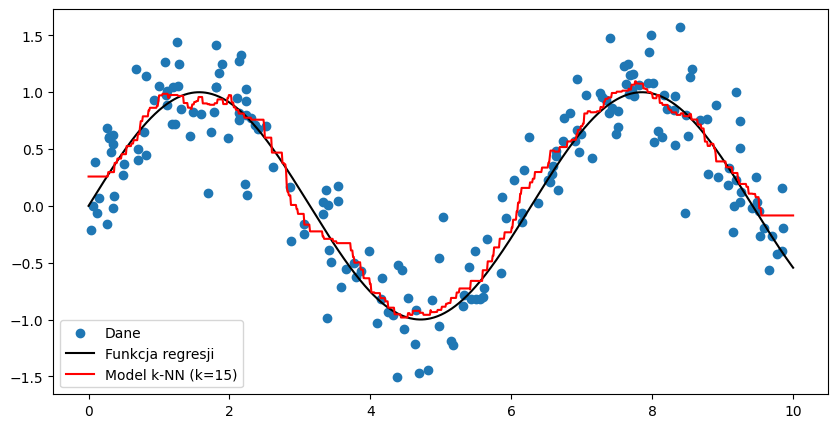

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, Y, label='Dane')
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x), label='Funkcja regresji', c="k")
ax.plot(x, knn.predict(x.reshape(1000, 1)), label=f'Model k-NN (k={k})', c="r")
ax.legend();

## Zadanie 3.3

Ustal wartość parametru $k$ dla modelu $k$-najbliższych sąsiadów.
Wygeneruj 100 zbiorów danych takich jak w zadaniu 3.1. Dla każdego zbioru danych wykonaj regresję metodą $k$-najbliższych sąsiadów. Na potrzeby następnego zadania dopasowane modele regresji przechowaj w liście.
Utwórz tablicę o wymiarach $1000 \times 100$, w której $i$-ta kolumna zawiera przewidywane wartości $Y$ dla $i$-tego modelu regresji w 1000 równoodległych punktach z przedziału $[0, 10]$. Narysuj wykresy:

- lewy – wykres przedstawiający wszystkie krzywe regresji dla kolejnych zbiorów danych,
- prawy – wykres przedstawiający średnią z krzywych regresji wraz z krzywą $\mathbb{E}(Y|X)$.

Oba wykresy powinny mieć ten sam zakres obu osi. Skomentuj jak zmiana parametru $k$ wpływa na postać obu wykresów. Porównaj swoje rysunki z [PRML](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf), str. 150, Fig. 3.5.

In [41]:
k = 10
n=200
list_of_models = []
y_hats=np.empty((1000,100))
xx=np.linspace(0,10,1000).reshape(1000,1)

for i in range(100):
  X, Y = generate_data(np.sin, a=0, b=10, n=200, sigma=0.3)
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X.reshape(n, 1), Y)
  list_of_models.append(knn)
  y_hats[:,i]=knn.predict(xx)


Text(0, 0.5, 'y')

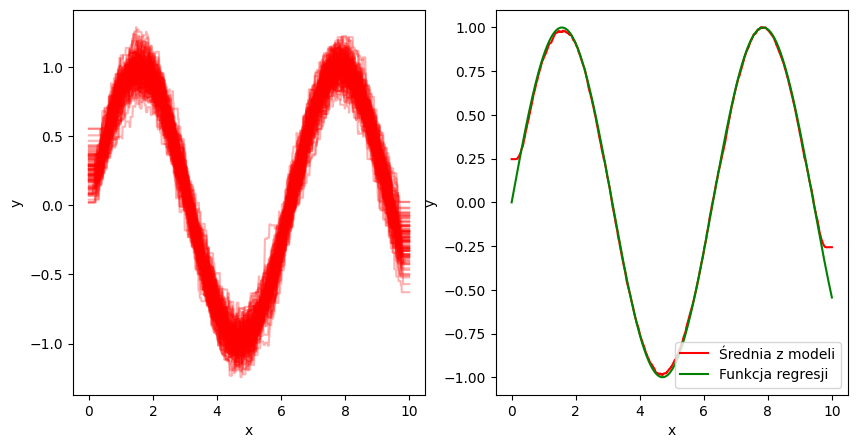

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
for i in range(100):
  ax1.plot(xx, y_hats[:,i], c='r', alpha=.3)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(xx, y_hats.mean(axis=1), label='Średnia z modeli', c='r')
ax2.plot(xx, np.sin(xx), label='Funkcja regresji', c="g")
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y')

## Zadanie 3.4

Z wykładu wiemy, że jeśli $Y = f(X) + \varepsilon$, to

\begin{equation}
\begin{split}
\mathbf{E}_{\mathcal{T}}((f(x_0) - \hat{f}(x_0))^2) &= [f(x_0) - \mathbf{E}_{\mathcal{T}}\hat{f}(x_0)]^2 + \mathbf{E}_{\mathcal{T}}[\mathbf{E}_{\mathcal{T}}\hat{f}(x_0) - \hat{f}(x_0)]^2\\
&= \operatorname{Bias}^2(\hat{f}(x_0)) + \operatorname{Var}_{\mathcal{T}}(\hat{f}(x_0))\\
&= \text{Błąd obciążenia} + \text{Wariancja predykcji}.
\end{split}
\end{equation}

gdzie $\mathcal{T}$ oznacza zbiór treningowy, a $\hat{f}$ model regresji zależny losowo od zbioru treningowego.
Korzystając z wykonanych już obliczeń możemy teraz sprawdzić te zależności eksperymentalnie.

Ustalmy punkt $x_0 = 5$. Niech $\hat{f}_j$, $j = 1, \ldots, 100$, oznacza $j$-ty model regresji z poprzedniego zadania. Wprowadźmy oznaczenie

\begin{equation*}
\overline{f}(x_0) = \frac{1}{100}\sum_{j=1}^{100}\hat{f}_j(x_0)
\end{equation*}

* Wyznacz kwadrat błędu obciążenia (*bias squared*):
\begin{equation*}
\text{Bias}^2= \left(f(x_0) - \overline{f}(x_0)\right)^2
\end{equation*}
* Wyznacz wariancję przewidywań modeli w punkcie $x_0$ (wariancja predykcji):
\begin{equation*}
\text{Var} = \frac{1}{100}\sum_{j=1}^{100}\left(\hat{f}_j(x_0) - \overline{f}(x_0)\right)^2
\end{equation*}
* Wyznacz średnią kwadratów błędów predykcji:
\begin{equation*}
\text{MSE} = \frac{1}{100}\sum_{j=1}^{100}\left(f(x_0) - \hat{f}_j(x_0)\right)^2
\end{equation*}

Czy wyniki eksperymentalne zgadzają się z teorią? Jaka zależność wiąże te trzy wielkości?

In [47]:
x0 = 5
values_at_x0=np.array([knn.predict([[x0]]) for knn in list_of_models])

In [58]:
mean_prediction_on_x0 = values_at_x0.mean()
bias_squared = np.mean((np.sin(x0) - mean_prediction_on_x0)**2)
variance = ((values_at_x0 - mean_prediction_on_x0)**2).mean()
mse = np.mean((np.sin(x0) - values_at_x0)**2).mean()

bias_squared, variance, mse

(np.float64(0.0004317033733434186),
 np.float64(0.009917606871221325),
 np.float64(0.010349310244564737))

In [57]:
bias_squared + variance, mse

(np.float64(0.010349310244564744), np.float64(0.010349310244564737))

## Zadanie 3.5

W zadaniu 3.4 szacowaliśmy średni kwadrat różnicy między funkcją regresji $\eta(x_0) = \mathbf{E}(Y|X=x_0)$ a wartością przewidywaną przez model. Teraz wyznaczymy eksperymentalnie średni kwadrat różnicy między wartością $Y$ w punkcie $x_0$ a wartością przewidywaną przez model. Z teorii wiemy, że

\begin{equation*}
\begin{split}
\mathbf{E}_{\mathcal{T}}\mathbf{E}((Y - \hat{f}(X))^2|X=x_0)
&= [f(x_0) - \mathbf{E}_{\mathcal{T}}\hat{f}(x_0)]^2 + \mathbf{E}_{\mathcal{T}}[\mathbf{E}_{\mathcal{T}}\hat{f}(x_0) - \hat{f}(x_0)]^2 + \operatorname{Var}(\varepsilon) \\
&= \operatorname{Bias}^2(\hat{f}(x_0)) + \operatorname{Var}_{\mathcal{T}}(\hat{f}(x_0)) + \operatorname{Var}(\varepsilon) \\
&= \text{Błąd obciążenia} + \text{Wariancja predykcji} + \text{Błąd losowy}.
\end{split}
\end{equation*}

gdzie $\varepsilon$ jest błędem losowym. W naszym przypadku $\varepsilon \sim N(0, 0.3^2)$.

Błąd obciążenia i wariancję predykcji obliczyliśmy już w zadaniu 3.4. Błąd losowy to $\operatorname{Var}(\varepsilon) = 0.3^2$. Lewa strona równania (2) jest aproksymowana przez:

\begin{equation}
\frac{1}{100}\sum_{j=1}^{100}\left(Y(x_0) - \hat{f}_j(x_0)\right)^2.\tag{2}
\end{equation}

Symbolem $Y(x_0)$ oznaczamy realizację zmiennej losowej $Y$ w punkcie $x_0$. Wyznacz (2) i porównaj sumą kwadratu błędu obciążenia, wariancji predykcji i błędu losowego.

## Zadanie 3.6

Dla każdego $k = 1, \ldots, 50$ wyznacz, tak jak w zadaniu 3.4, błąd obciążenia, wariancję predykcji i średni kwadrat błędu predykcji. Narysuj wykresy zależności tych trzech wielkości od parametru $k$.